In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from plot_derived_parameters.plot_function import *

In [3]:
# load in the data
chainLocation = "analysis/chains/"
planck2015Data = loadChainFolder( 'plot_derived_parameters/chains/CDI_2/' )

/home/zequnl/anaconda3/lib/python3.6/site-packages/astropy/table/table.py:2622: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In [4]:
# take a look at what is in this table
planck2015Data.colnames

['acceptance',
 'likelihood',
 'omega_b',
 'omega_cdm',
 '100theta_s',
 'tau_reio',
 'P_{RR}^1',
 'P_{RR}^2',
 'P_{II}^1',
 'P_{II}^2',
 'P_{RI}^1',
 'A_planck']

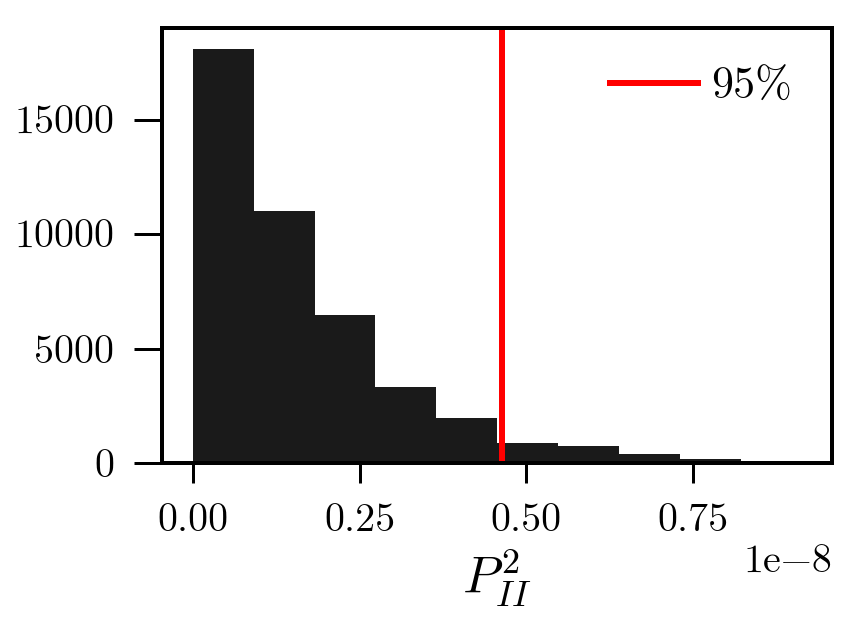

In [18]:
# determine 95% percentile isocurvature power 
# (I'm using P_II^2, you could use some other choice)
quantity = planck2015Data["P_{II}^2"]
plt.hist(quantity)
upper_95 = np.percentile(quantity, 95)
plt.xlabel(r"$P_{II}^2$")
plt.axvline(upper_95, color="red", label="95%")
plt.legend()
# plt.yscale("log")

In [19]:
# filter by this large isocurvature fraction and get the maximum likelihood sample
filtered = planck2015Data[quantity > upper_95]
filtered[ np.argmax(-filtered["likelihood"]) ]

acceptance,likelihood,omega_b,omega_cdm,100theta_s,tau_reio,P_{RR}^1,P_{RR}^2,P_{II}^1,P_{II}^2,P_{RI}^1,A_planck
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
27,5356.33,2.235234,0.1184131,1.041419,0.07000848,2.39496e-09,2.092462e-09,2.39416e-12,7.096496e-09,-4.217695e-12,100.0804
